<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Студент: Власов Николай Вячеславович

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [208]:
#!pip install ydata_profiling
#!pip install setuptools
#!pip install ipywidgets
#!pip install scikit-learn

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import re
import sklearn
import pickle
import phik
import os
%matplotlib inline

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [210]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

---
---
---
## Просмотр из чего состоит датасет

In [211]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


## Определение наличия пропусков

In [212]:
print("Колонки, в которых есть пропуски (train): ",df_train.columns[df_train.isnull().any()].tolist())
print("Колонки, в которых есть пропуски (test): ", df_test.columns[df_test.isnull().any()].tolist())

Колонки, в которых есть пропуски (train):  ['mileage', 'engine', 'max_power', 'torque', 'seats']
Колонки, в которых есть пропуски (test):  ['mileage', 'engine', 'max_power', 'torque', 'seats']


## Определение наличия дубликатов

In [213]:
print("Количестао дубликатов (train): ",df_train.duplicated().sum())
print("Количестао дубликатов (test): ", df_test.duplicated().sum())

Количестао дубликатов (train):  985
Количестао дубликатов (test):  62


**Ваш ответ здесь.**

## Создание дашборда 

In [214]:
profile = ProfileReport(df_train, title="Profiling Report")

In [215]:
#profile.to_notebook_iframe()

In [216]:
profile.to_file("cars_train_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 482.57it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [217]:
profile_test = ProfileReport(df_test, title="Profiling Test Report")

In [218]:
profile_test.to_file("cars_test_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 592.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Выводы по дашборду train
### Датасет состоит из:
 - Categorical колонок - 4
 - Text колонок - 5
 - Categorical колонок - 4
### Выводы по колонкам:
 - Пропущенных ячеек - 95
 - Самый частый год машины - 2017
 - Самая встречаемая марка машины - maruti
 - Медианная цена продажи - 450000, а средняя - 639515.2
 - Медианный пробег машины - 60000, а средний - 69584.616
 - Больше всего представлен дизельный двигатель
 - Чаще продают лично а не через автодилера
 - Больше всего представлена МКПП
 - Больше всего представлены автомобили с одним владельом
 - колонки **mileage, engine, max_power, torque** требует обработки, т.к в них спутаны числа с обозначениями
 - Больше всего 5 местных авто
 - Наибольшая корреляция между колонками **year - km_driven** (обратная корр.) и **year - selling_price** (прямая)

## Выводы по дашборду test
### Датасет состоит из:
 - Categorical колонок - 4
 - Text колонок - 5
 - Categorical колонок - 4
### Выводы по колонкам:
 - Пропущенных ячеек - 1005
 - Самый частый год машины - 2017
 - Самая встречаемая марка машины - maruti
 - Медианная цена продажи - 434999, а средняя - 617901.04
 - Медианный пробег машины - 61500, а средний - 71393.341
 - Больше всего представлен дизельный двигатель
 - Чаще продают лично а не через автодилера
 - Больше всего представлена МКПП
 - Больше всего представлены автомобили с одним владельом
 - колонки **mileage, engine, max_power, torque** требует обработки, т.к в них спутаны числа с обозначениями
 - Больше всего 5 местных авто
 - Наибольшая корреляция между колонками **year - km_driven** (обратная корр.) и **year - selling_price** (прямая)

Достаточно много пропущенных, количество дубликатов не так критично.

---
---
---

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

---
---
---
### Получение статистики по числовым стобцам train

In [219]:
# Ваш код здесь
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Получение статистики по числовым стобцам test

In [220]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


### Получение статистики по числовым категориальным train

In [221]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


### Получение статистики по числовым категориальным test

In [222]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


### Получение столбцов number

In [223]:
num_col=df_train.select_dtypes(include='number').columns

### Сравнение средней и медианы train

In [224]:
print(df_train[num_col].mean(),"\n\n")
print(df_train[num_col].median())

year               2013.818403
selling_price    639515.197171
km_driven         69584.615517
seats                 5.419008
dtype: float64 


year               2015.0
selling_price    450000.0
km_driven         60000.0
seats                 5.0
dtype: float64


### Сравнение средней и медианы test

In [225]:
print(df_test[num_col].mean(),"\n\n")
print(df_test[num_col].median())

year               2013.681000
selling_price    617901.042000
km_driven         71393.341000
seats                 5.410805
dtype: float64 


year               2014.0
selling_price    434999.0
km_driven         61500.0
seats                 5.0
dtype: float64


### Более наглядное сравнение

In [226]:
comparison = pd.DataFrame({
    'Train (mean)': df_train[num_col].mean(),
    'Test (mean)': df_test[num_col].mean(),
    'Δ mean': df_test[num_col].mean() - df_train[num_col].mean(),
    'Train (median)': df_train[num_col].median(),
    'Test (median)': df_test[num_col].median(),
    'Δ median': df_test[num_col].median() - df_train[num_col].median(),
    'Δ Train': df_train[num_col].mean() - df_train[num_col].median(),
    'Δ Test': df_test[num_col].mean() - df_test[num_col].median(),
})
comparison

,Train (mean),Test (mean),Δ mean,Train (median),Test (median),Δ median,Δ Train,Δ Test
year,2013.818403,2013.681000,-0.137403,2015.0,2014.0,-1.0,-1.181597,-0.319000
selling_price,639515.197171,617901.042000,-21614.155171,450000.0,434999.0,-15001.0,189515.197171,182902.042000
km_driven,69584.615517,71393.341000,1808.725483,60000.0,61500.0,1500.0,9584.615517,9893.341000
seats,5.419008,5.410805,-0.008203,5.0,5.0,0.0,0.419008,0.410805


### Выводы по сравнению средней и медианы

По представленным результатам сравнения можно сказать, что все значения распределения признаков близки, хотя и есть некоторая погрешность. Наибольшая разница получилась между средней и медианы цены авто, что может говорить о выбросах в данных.

### Выводы по статистикам
В Train (number) возможно присутсвуют выбросы km_driven - 2.36 млн. км. (хотя всякие авто бывают) и цена 10 млн. при средне1 0.6 млн. В остальном данные согласованы и не вызывают нареканий.
В Test (number) уже нет таких экстремумов, как в train, что говорит о более гладком распределении.
В Train и Test (object) как и говорилось раннее столбцы (fuel	seller_type	transmission	owner	mileage	engine	max_power	torque) следует преобразовать к number для лучшего анализа, т.к данных этому способствуют. В остальном более подробный отчет о каждом признаке был выполнен в пред. пункте с дашбордом.

---
---
---

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

---

### Сначала опустим целевой столбец

In [227]:
X_train=df_train.drop('selling_price', axis=1)
X_train.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


### Посмотрим на количество дубликатов

In [228]:
print("num of duplicated row witg price - ",X_train.duplicated().sum())
print("num of duplicated row without price - ",df_train.duplicated().sum())

num of duplicated row witg price -  1159
num of duplicated row without price -  985


### Отобразим дубликаты

In [229]:
df_train[X_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### Удалим повторяющиеся строки

In [230]:
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first').reset_index(drop=True)

In [231]:
df_train.shape

(5840, 13)

### Проверка на правильность избавления от дубликатов

In [232]:
assert df_train.shape == (5840, 13)

### Могут ли в данных быть другие скрытые дубли?
ДА, могут. Возоможно в torque записаны одинаковые значения, только по разному обозначены. Их надо привести к одному знаменателю и потом снова провести проверку на дубли.

---
---
---

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

---
---
---
### Создадим функцию, которая будет очищать столбцы mileage, engine, max_power (Для этого я использовал LLM, т.к копаться с ругулярками крайне не охота)

In [233]:
# your code here
def column_cleaner(val):
    match = re.search(r'(\d+\.?\d*)', str(val))
    return float(match.group(1)) if match else np.nan

In [234]:
df_train['mileage'] = df_train['mileage'].apply(column_cleaner)
df_test['mileage'] = df_test['mileage'].apply(column_cleaner)

In [235]:
df_train['engine'] = df_train['engine'].apply(column_cleaner)
df_test['engine'] = df_test['engine'].apply(column_cleaner)

In [236]:
df_train['max_power'] = df_train['max_power'].apply(column_cleaner)
df_test['max_power'] = df_test['max_power'].apply(column_cleaner)

In [237]:
df_train['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
5835              96.1Nm@ 3000rpm
5836                90Nm@ 3500rpm
5837             113.7Nm@ 4000rpm
5838    24@ 1,900-2,750(kgm@ rpm)
5839               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object

### Создадим функцию, которая будет очищать torque (Для этого я использовал LLM, т.к копаться с ругулярками крайне не охота)

In [238]:
def parse_torque_max_rpm(torque_str):
    if pd.isna(torque_str):
        return np.nan, np.nan
    
    s = str(torque_str).lower()
    
    # === 1. Извлекаем крутящий момент ===
    torque_match = re.search(r'(\d+\.?\d*)', s)
    if not torque_match:
        return np.nan, np.nan
    torque_val = float(torque_match.group(1))
    
    # === 2. Конвертация kgm → Nm ===
    if 'kgm' in s or 'kgf' in s:
        torque_Nm = torque_val * 9.80665
    else:
        torque_Nm = torque_val
    
    # === 3. Извлекаем ВСЕ числа из части после крутящего момента ===
    # Удаляем запятые (для "1,900" → "1900")
    s_no_comma = re.sub(r',', '', s)
    
    # Найдём позицию крутящего момента и отрежем всё до неё
    torque_pos = torque_match.end()
    rpm_part = s_no_comma[torque_pos:]
    
    # Извлекаем ВСЕ числа из оставшейся части (там должны быть только RPM)
    rpm_numbers = re.findall(r'\d{3,5}', rpm_part)
    rpm_numbers = [int(x) for x in rpm_numbers if int(x) >= 500]  # фильтр по разумному порогу
    
    if not rpm_numbers:
        return torque_Nm, np.nan
    
    # Берём МАКСИМАЛЬНОЕ значение — это и есть max_torque_rpm
    max_rpm = max(rpm_numbers)
    
    return torque_Nm, max_rpm

In [239]:
parsed = df_train['torque'].apply(parse_torque_max_rpm)
df_train['max_torque_rpm']=parsed.apply(lambda x: x[1])
df_train['torque']=parsed.apply(lambda x: x[0])

In [240]:
parsed = df_test['torque'].apply(parse_torque_max_rpm)
df_test['max_torque_rpm']=parsed.apply(lambda x: x[1])
df_test['torque']=parsed.apply(lambda x: x[0])

### Убедимся в правильности преобразования

In [241]:
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.66896,5.0,2750.0


---
---
---

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






---
---
---
### Заполним пропуски в столбцах медианами. Медианой заполняются пропуски т.к он она менее подвержана влиянию выбросов и более объективно демонстрирует центральное или доминирующее значение.

In [242]:
# your code here
median_train = df_train.median(numeric_only=True)
df_train.fillna(median_train, inplace=True)
df_test.fillna(median_train, inplace=True)

### Проверим, остались ли пропуски

In [243]:
print("Колонки, в которых есть пропуски (train): ",df_train.columns[df_train.isnull().any()].tolist())
print("Колонки, в которых есть пропуски (test): ", df_test.columns[df_test.isnull().any()].tolist())

Колонки, в которых есть пропуски (train):  []
Колонки, в которых есть пропуски (test):  []


### Как правильно считать медиану для заполнения?
 -  По тренировочным данным для `train` и `test`, чтобы данные из `test` не влияли на обучение.

---
---
---

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

---
---
---
### Приведение столбцов к int

In [244]:
# your code here
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')

df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

### Проверка

In [245]:
df_train[['engine', 'seats']].dtypes

engine    int64
seats     int64
dtype: object

### Почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?
#### т.к зачастую от количества мест в машине, она можнт быть отнесена к различным категориям, а следовательно и цене:
 - 2-4 места: кабриолеты и спортивные автомобили
 - 5-7 мест: средний класс, т.е стандартные машины (хоть и не всегда)
 - 7+ мест: специализированные авто (автобусы, минивэны и т.д)

---
---
---

`Your answer here`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

---
---
---

In [246]:
# Ваш код здесь
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.930478,5.426712,3045.789041
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,116.757608,0.982344,911.039323
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.055660,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,3726.527000,14.000000,21800.000000


In [247]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,177.617377,5.403000,3098.27600
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,103.734516,0.912921,877.14712
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,48.000000,4.000000,1500.00000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,111.700000,5.000000,2500.00000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,160.000000,5.000000,3000.00000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,205.000000,5.000000,4000.00000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,1421.964250,9.000000,5200.00000


In [248]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [249]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [250]:
num_col=df_train.select_dtypes(include='number').columns

### Более наглядное сравнение

In [251]:
comparison = pd.DataFrame({
    'Train (mean)': df_train[num_col].mean(),
    'Test (mean)': df_test[num_col].mean(),
    'Δ mean': df_test[num_col].mean() - df_train[num_col].mean(),
    'Train (median)': df_train[num_col].median(),
    'Test (median)': df_test[num_col].median(),
    'Δ median': df_test[num_col].median() - df_train[num_col].median(),
    'Δ Train': df_train[num_col].mean() - df_train[num_col].median(),
    'Δ Test': df_test[num_col].mean() - df_test[num_col].median(),
})
comparison

,Train (mean),Test (mean),Δ mean,Train (median),Test (median),Δ median,Δ Train,Δ Test
year,2013.428425,2013.681000,0.252575,2014.00,2014.000,0.000,-0.571575,-0.319000
selling_price,522960.091096,617901.042000,94940.950904,405000.00,434999.000,29999.000,117960.091096,182902.042000
km_driven,73952.242466,71393.341000,-2558.901466,70000.00,61500.000,-8500.000,3952.242466,9893.341000
mileage,19.430841,19.338810,-0.092031,19.37,19.370,0.000,0.060841,-0.031190
engine,1429.448973,1454.876000,25.427027,1248.00,1248.000,0.000,181.448973,206.876000
max_power,87.906371,90.841670,2.935299,81.86,82.425,0.565,6.046371,8.416670
torque,175.930478,177.617377,1.686899,160.00,160.000,0.000,15.930478,17.617377
seats,5.426712,5.403000,-0.023712,5.00,5.000,0.000,0.426712,0.403000
max_torque_rpm,3045.789041,3098.276000,52.486959,3000.00,3000.000,0.000,45.789041,98.276000


### Выводы по сравнению
После анализа того, что было до заполнения пропусков в задание 2, можно сказать, что:
 - среднее и медиана тестового датасета практически не изменилась
 - (mean) и (median) в selling_price уменьшился
 - (mean) и (median) в km_driven наоборот увеличился
 

Из за чего распределения параметров было смещено и как такое может быть, если мы вставляли медианные значения на месте пропусков, и по идее, как минимум, медианные значения должны были остаться на месте?


Все потому, что те расчеты, которые проводились во 2 пункте были сделаны до исключения дубликатов. Т.е значения (mean) и (median) для каждого столбца обновилось а т.к в в наборе Test дубликаты не трогали, то и его значения практически не должны измениться, что и видно при сравнении.

---
---
---

`Your answer here`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

---
---
---
Можно ли предположить на основе распределений связь признаков с целевой переменной?
 Да, можно. Например:
 - связь года и цены - возможно прямая линейная (хотя может и квадратичная ) (чем больше год, тем больше цена)
 - связь пробега и цены - отрицательная (чем меньше пробег, тем больше цена)
 - связь toque и цены похожа на логарифмическую
 - и т.д
 
Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
 Да, можно, но не для всех. Например:
 - чем больше год, тем меньше пробег (отриц)
 - мем больше объём — тем выше мощность (полож)
 - и т.д

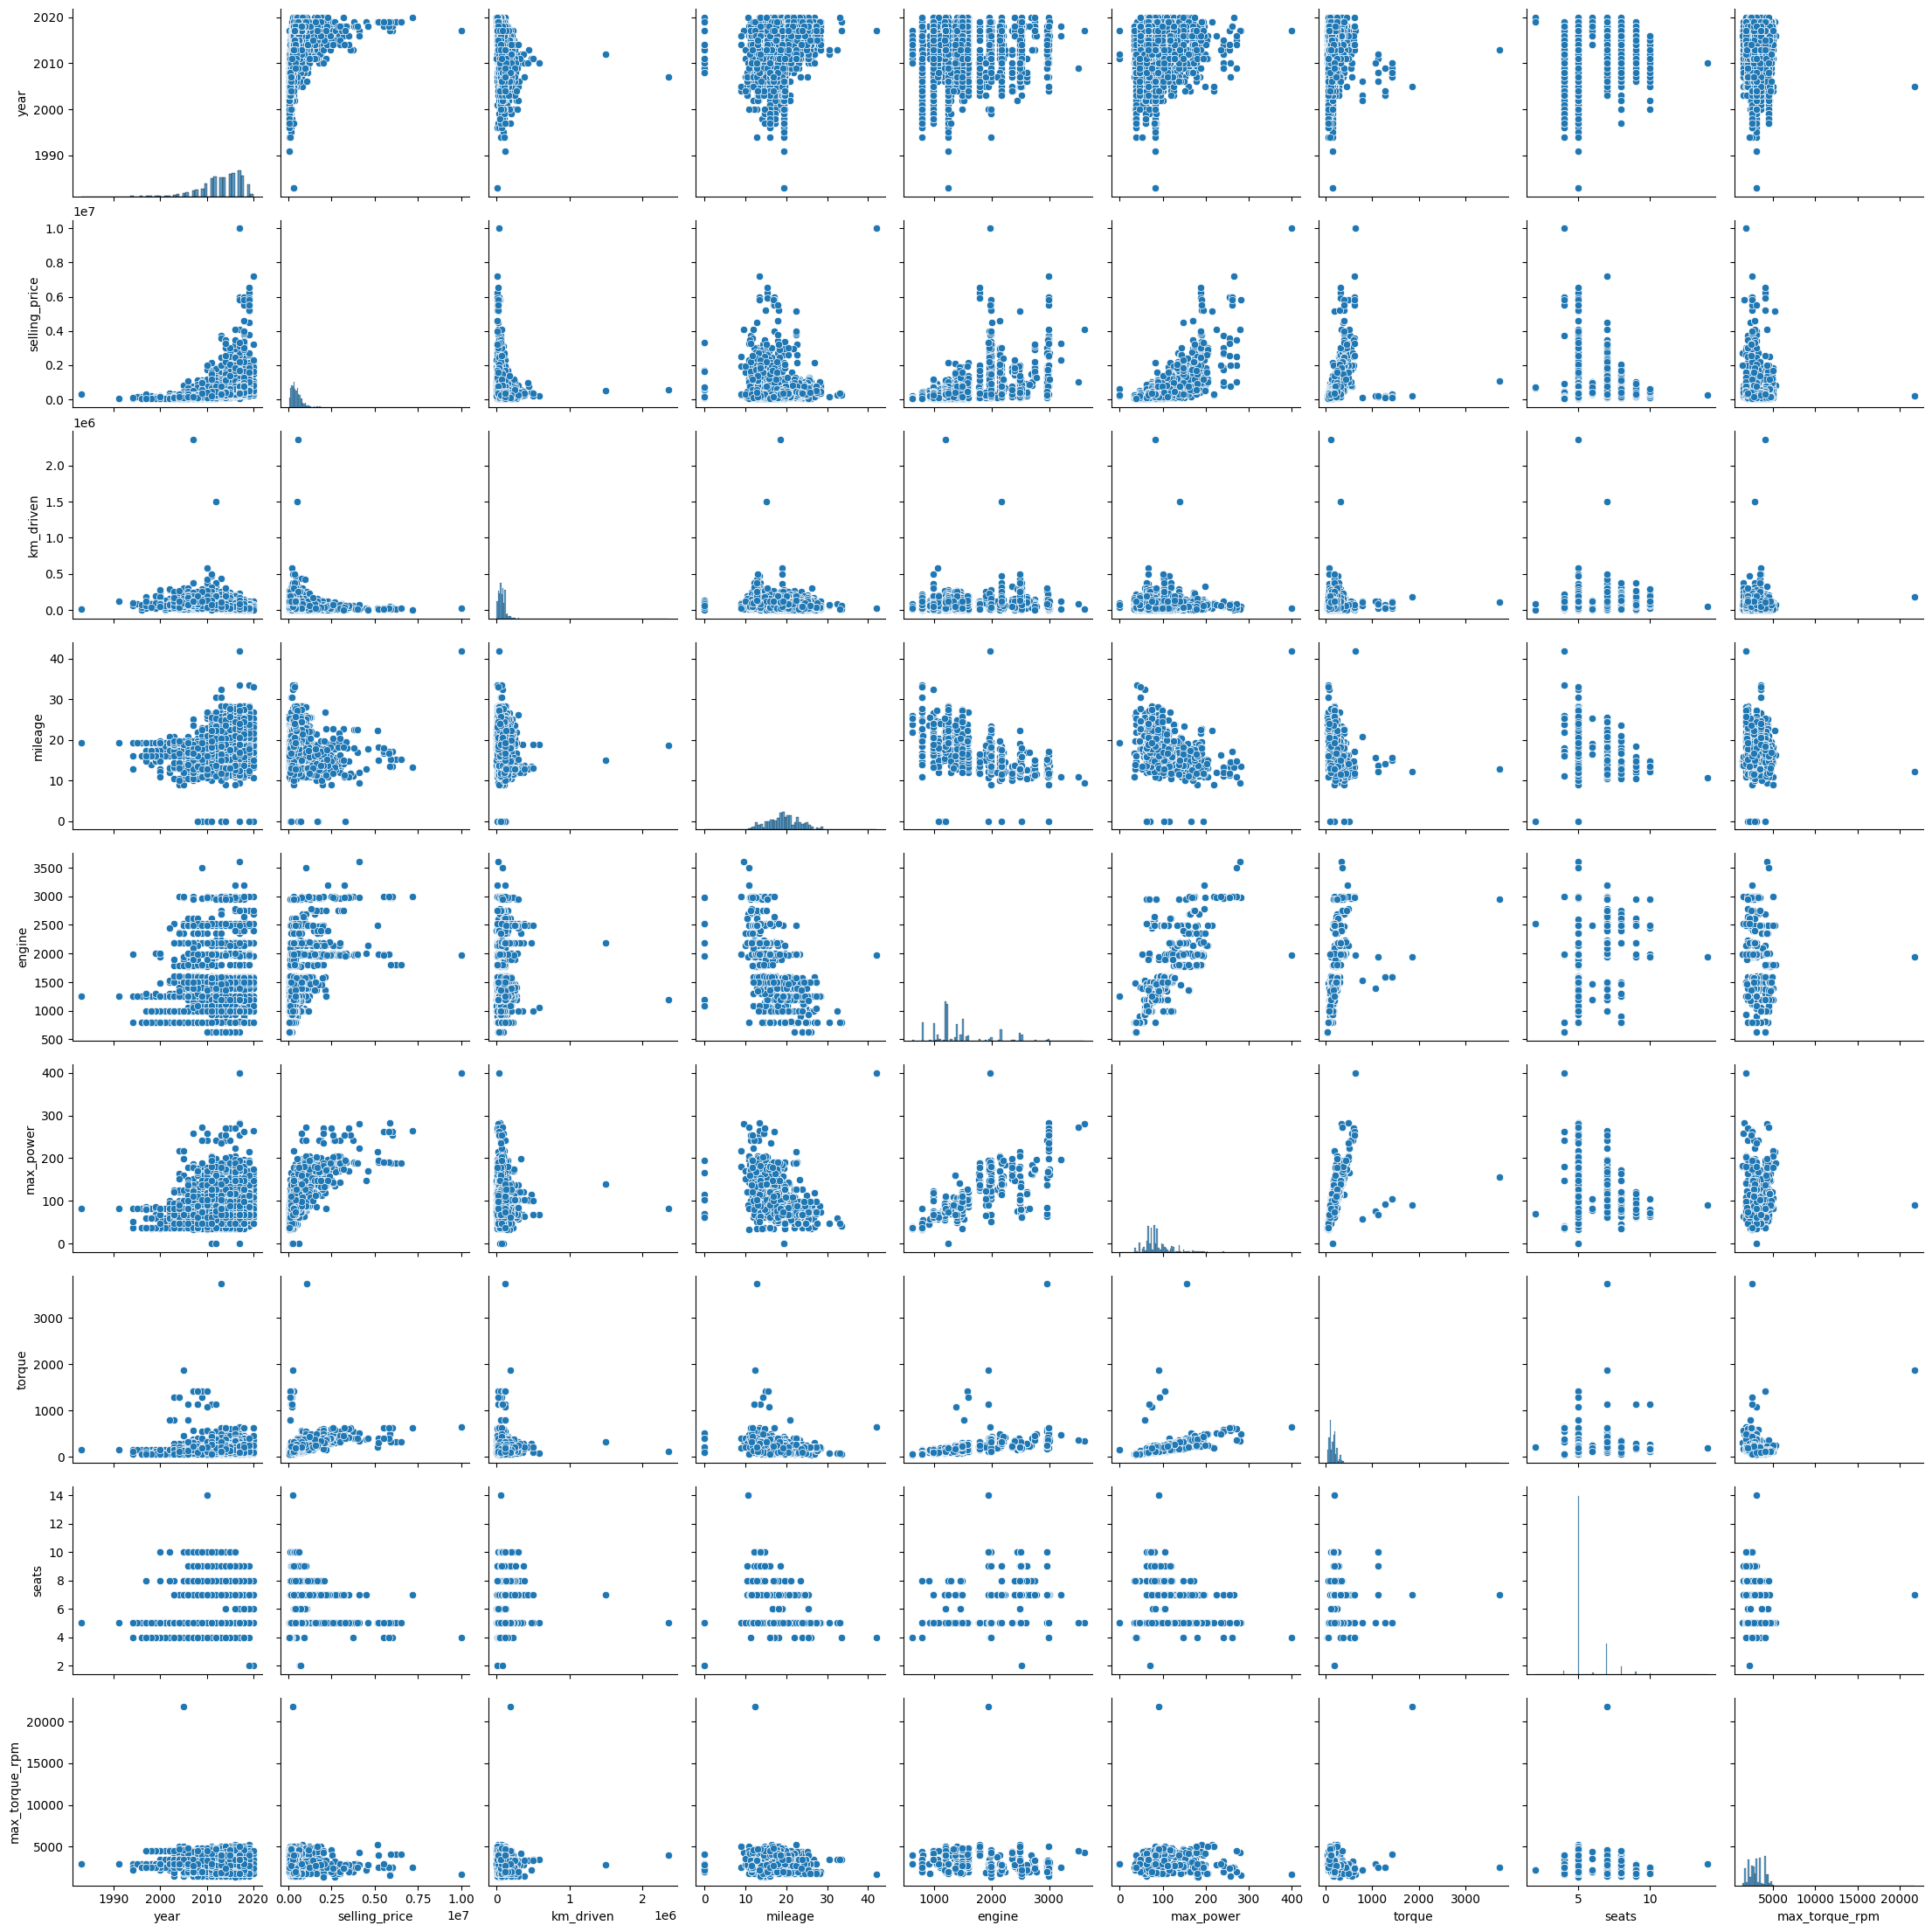

In [252]:
# your code here
num_col = df_train.select_dtypes(include='number').columns
sns.pairplot(df_train[num_col])
plt.show()

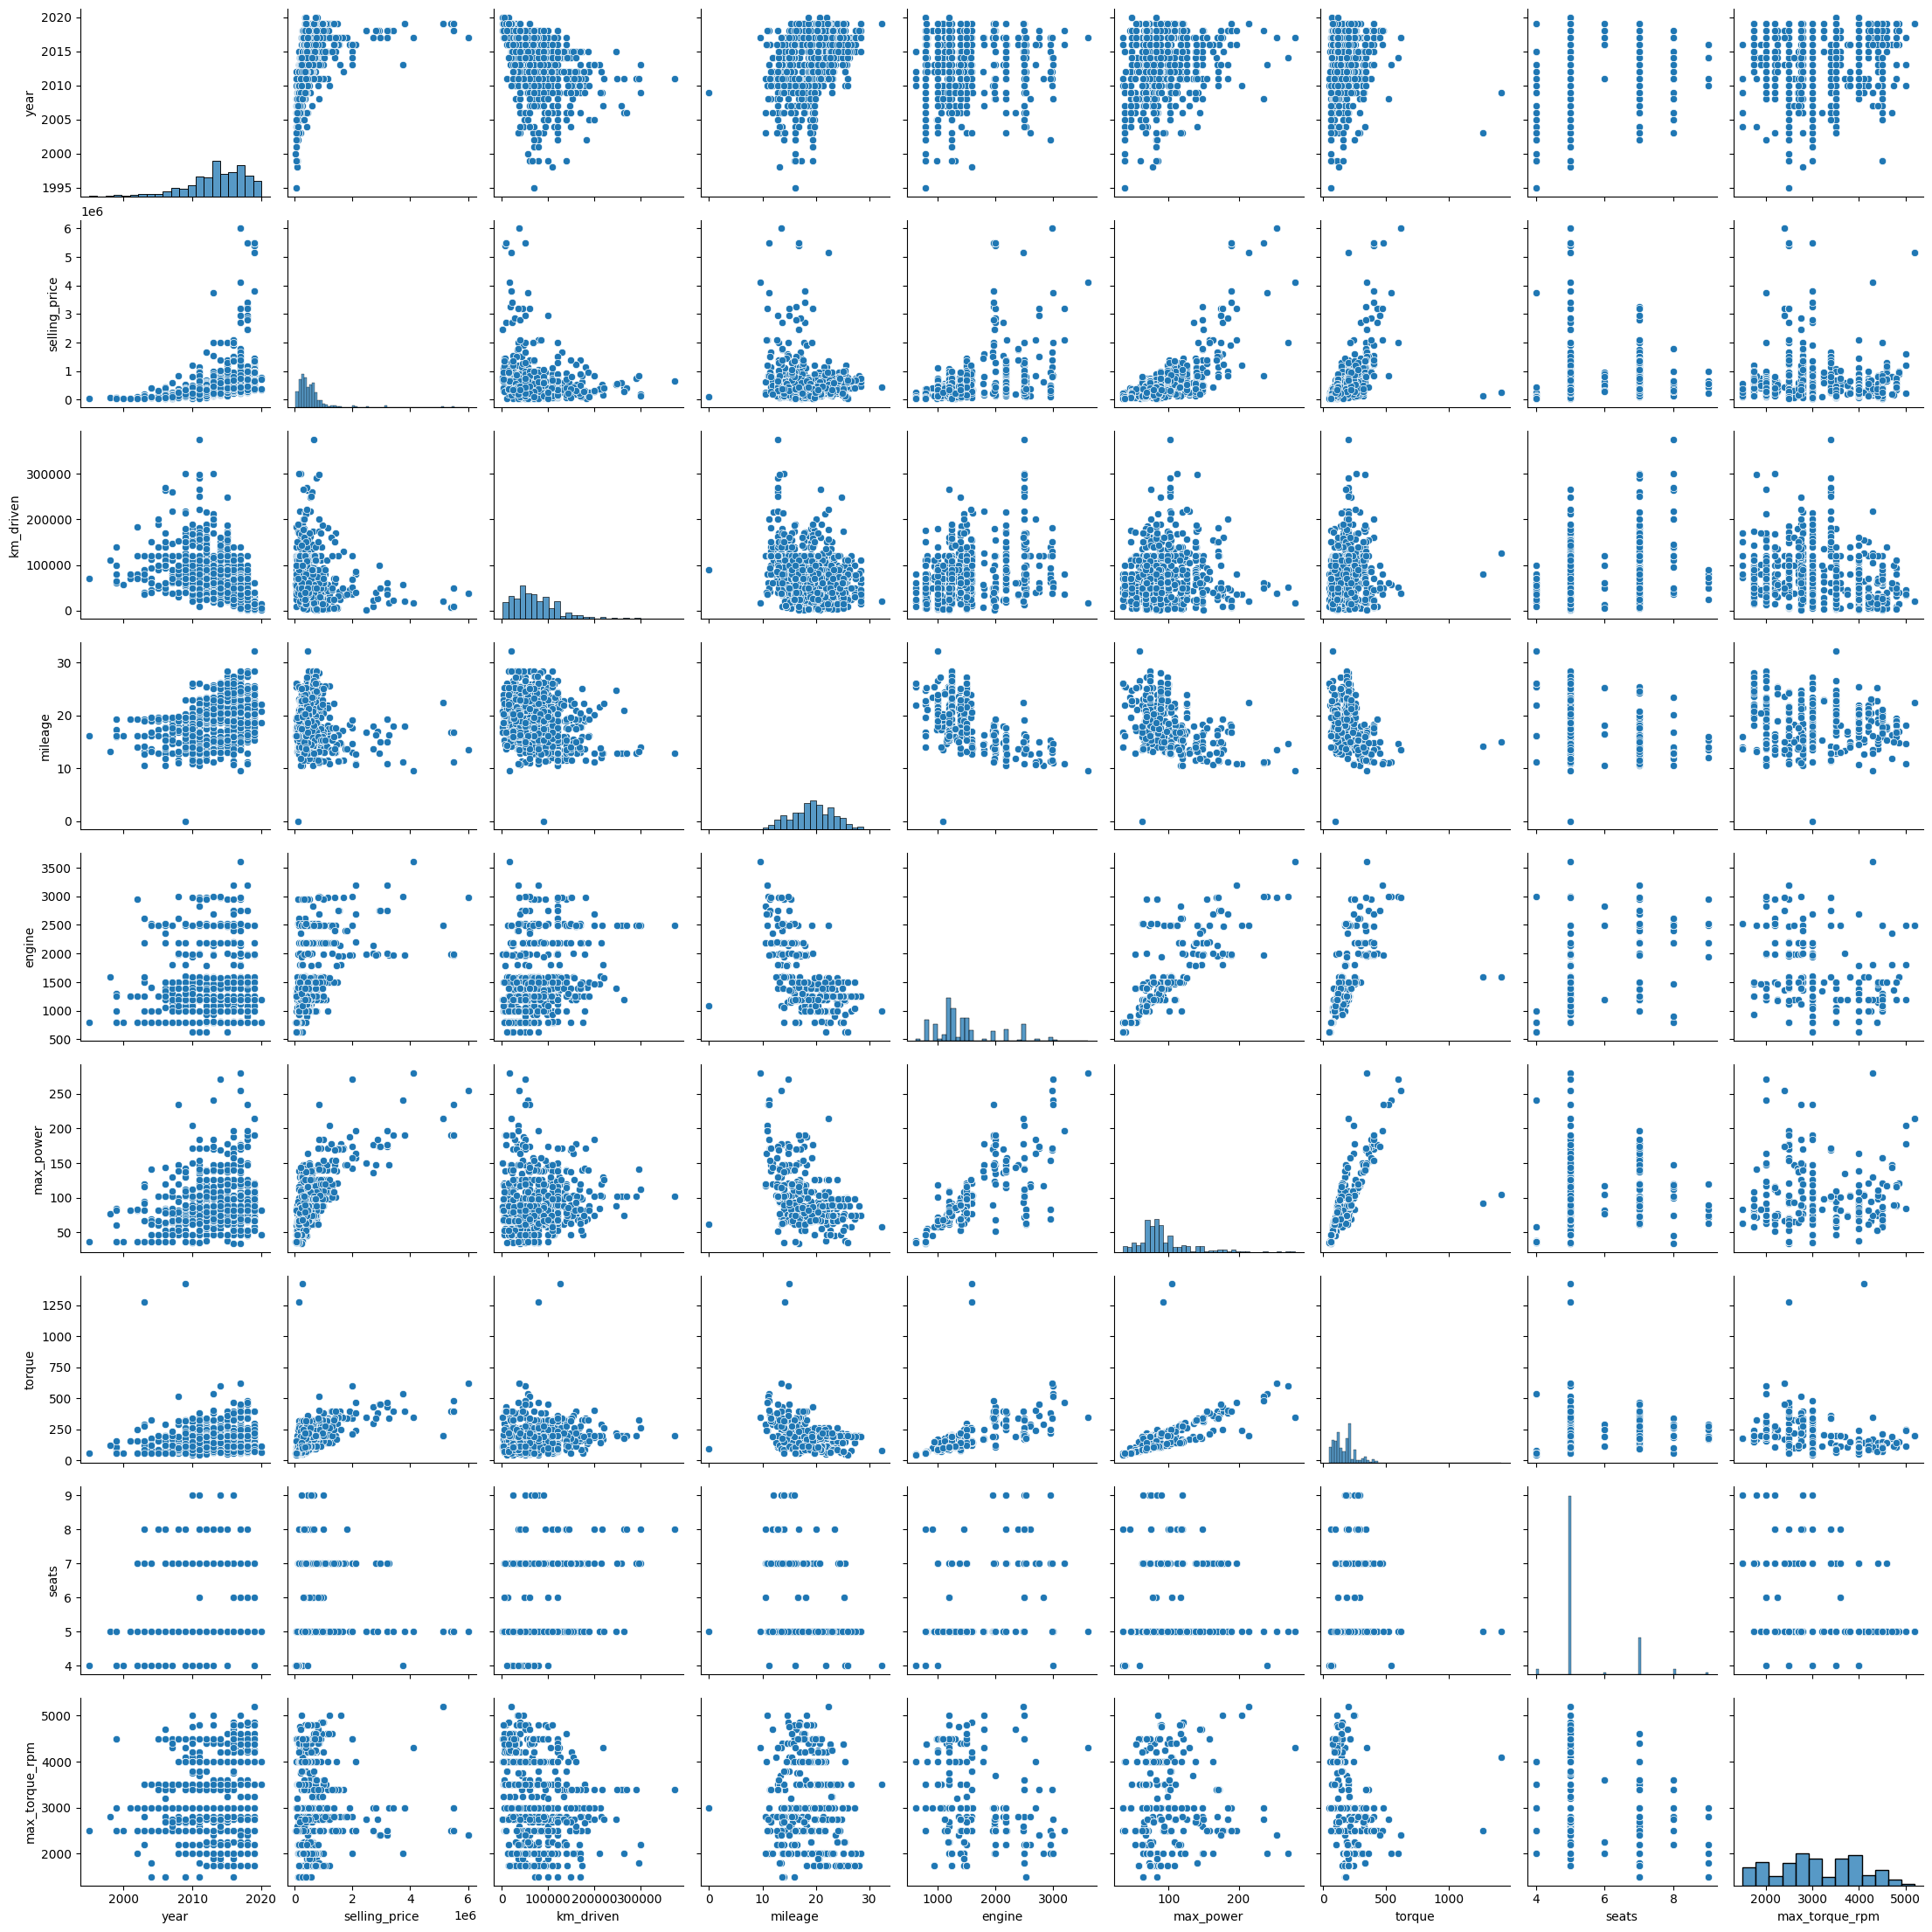

In [253]:
num_col = df_test.select_dtypes(include='number').columns
sns.pairplot(df_test[num_col])
plt.show()

### Похожими ли оказались совокупности при разделении на трейн и тест
Да похожи, за исключением того, что в train больще выборка и там больще выбросов, что искажает визуализацию данных

---
---
---

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

---
---
---

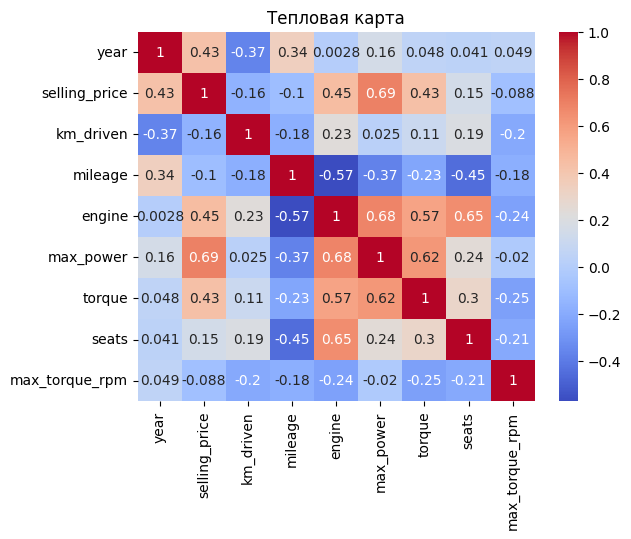

In [254]:
# your code here
corr_matrix = df_train[num_col].corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title("Тепловая карта")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

### Какие 2 признака наименее скоррелированы между собой?
- между year - engine (0.002819)  и  max_power - max_torque_rpm (-0.019995)
### Между какими наблюдается довольно сильная положительная линейная зависимость?
- между selling_price - max_power (0.692814)  и  engine - max_power (0.681117) и seats - engine (0.652172)
### Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
- Да верно. старые автомобили в имеют больший пробег
### Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?
- я по умолчанию использовал Пирсона, еще есть корреляция Кендалла и корреляция Спирмена



---
---
---

`Your answer here`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


---
---
---

Корреляция Спирмена рассчитывается по формуле:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

где:
- $(\rho)$ — коэффициент корреляции Спирмена,
- $(d_i)$ — разность между рангами пар значений $(x_i)$ и $(y_i)$,
- $(n)$ — количество наблюдений.

Корреляция Спирмена, вычисленная по рангам:

$$
\rho = \frac{\text{cov}(\text{rank}(X), \text{rank}(Y))}{\sigma_{\text{rank}(X)} \cdot \sigma_{\text{rank}(Y)}}
$$

Или в развёрнутом виде:

$$
\rho = \frac{\sum_{i=1}^{n} (R_{x_i} - \bar{R}_x)(R_{y_i} - \bar{R}_y)}{\sqrt{\sum_{i=1}^{n} (R_{x_i} - \bar{R}_x)^2} \cdot \sqrt{\sum_{i=1}^{n} (R_{y_i} - \bar{R}_y)^2}}
$$

где:
- $( R_{x_i} )$ — ранг $( x_i )$
- $( \bar{R}_x )$ — среднее всех рангов $( X )$ (равно $( (n+1)/2 )$)
- Аналогично для $( Y )$


In [255]:
# your code here
def spearman_corr(x, y):
    rank_x = x.rank()
    rank_y = y.rank()
    
    mean_x = np.mean(rank_x)
    mean_y = np.mean(rank_y)

    upper_sum = np.sum((rank_x - mean_x) * (rank_y - mean_y))
    lower_sun = np.sqrt(np.sum((rank_x - mean_x)**2) * np.sum((rank_y - mean_y)**2))
    return upper_sum / lower_sun

x = df_train['selling_price']
y = df_train['seats']

manual = spearman_corr(x, y)
pandas = df_train[['selling_price', 'seats']].corr(method='spearman').iloc[0, 1]

print(f"Ручная реализация: {manual:.4}")
print(f"Pandas: {pandas:.4}")
print(f"Разница: {abs(manual - pandas)}")

Ручная реализация: 0.3176
Pandas: 0.3176
Разница: 0.0


### выводы по результатам:
По итогу получилась такая же реализация как и в pandas. Обычно Пирсен используется для линейной зависимости а Спирмен для монотонной (прочитал на Хабре).

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


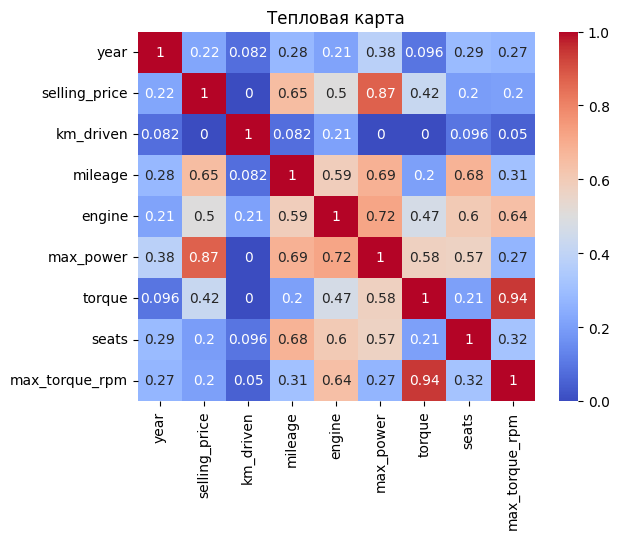

In [256]:
phik_matrix = df_train[num_col].phik_matrix()
sns.heatmap(phik_matrix,annot=True, cmap='coolwarm')
plt.title("Тепловая карта")
plt.show()

### Как видно из карты phik выявил сильную зависимость между max_torque_rpm - torque, который Пирсен вообще не отметил. А также selling_price - mileage  и max_torque_rpm - engine
---
---
---

`Your answer here`

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

---
---
---

### Посмотрим распределение параметров, по которым можно понять закономерность их распределения

In [257]:
df_train.to_csv('models/df_train_processed.csv', index=False)

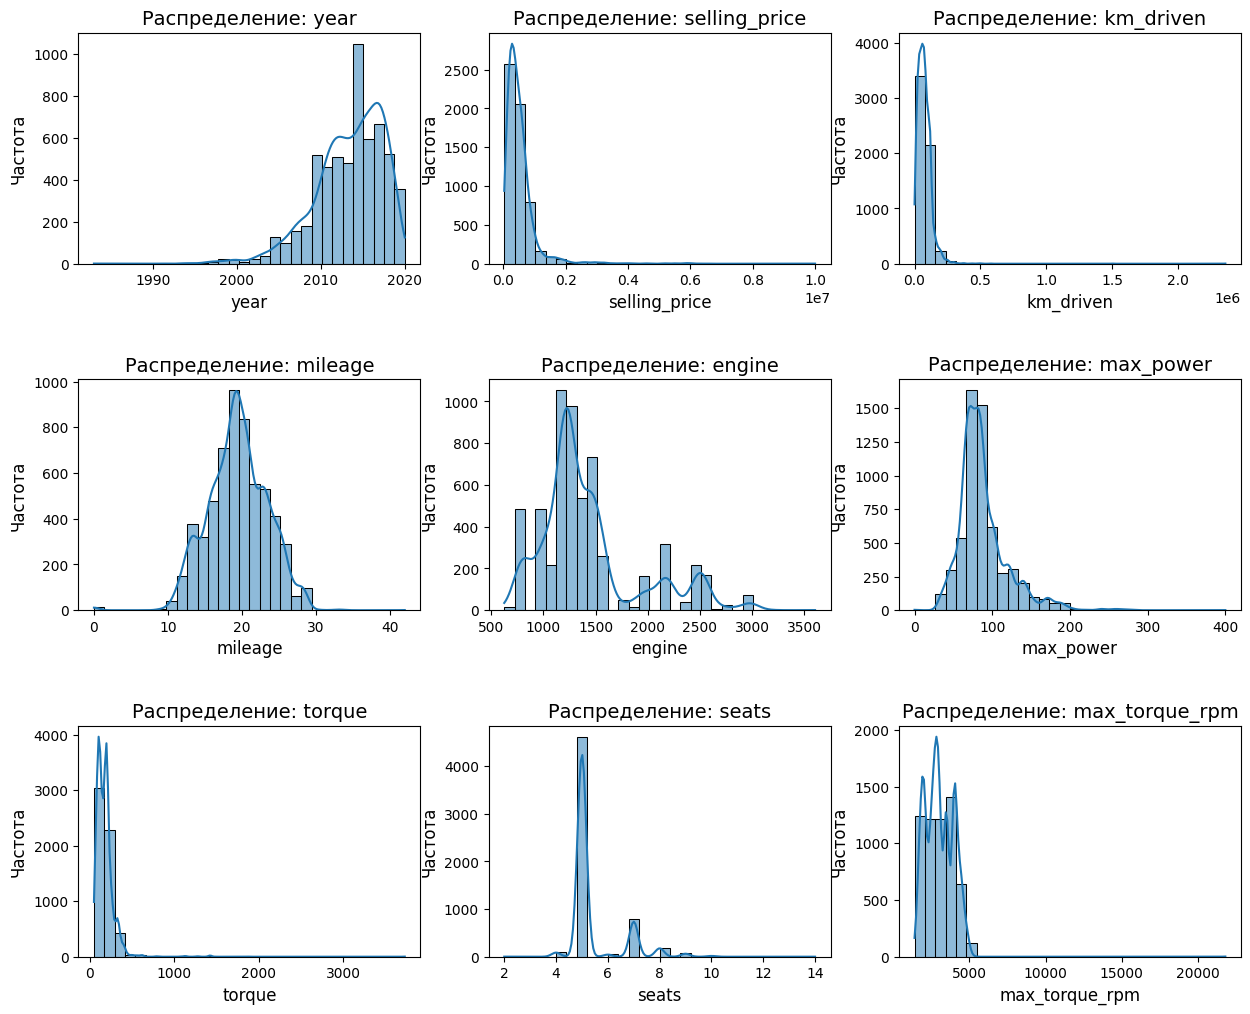

In [258]:
# your code here
num_col = df_train.select_dtypes(include=['number']).columns.tolist()

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(
        x=col,
        data=df_train,
        bins=30,
        kde=True,
        ax=axes[i]
    )
    plt.subplots_adjust(hspace=0.5) 
    axes[i].set_title(f'Распределение: {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Частота', fontsize=12)

### Посмотрим распределеление цены автомобиля в зависимости от года и тип двигателя

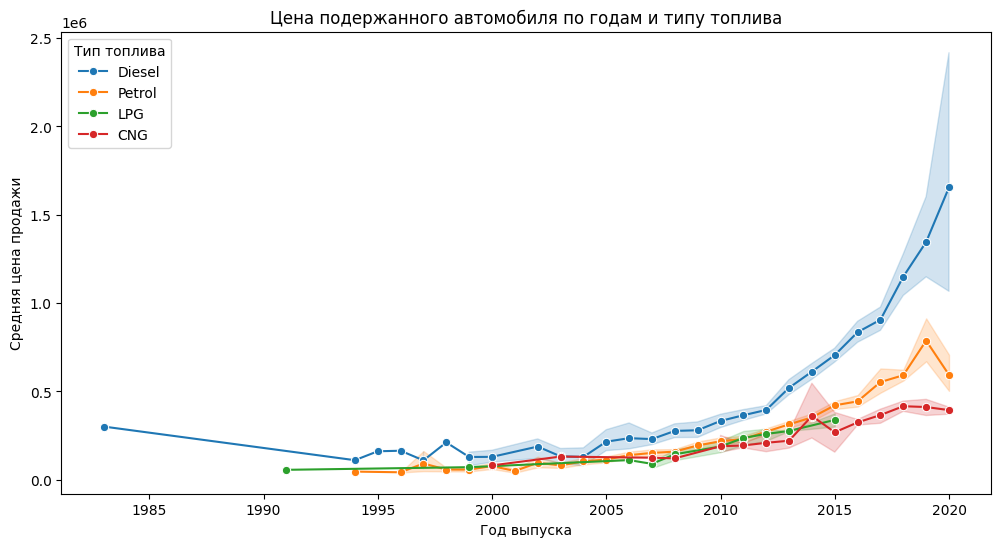

In [259]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_train,
    x='year',
    y='selling_price',
    hue='fuel',
    marker='o',
)
plt.title('Цена подержанного автомобиля по годам и типу топлива')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена продажи')
plt.legend(title='Тип топлива')
plt.show()

---
---
---

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

---
---
---

In [260]:
y_train = df_train['selling_price']# your code here
X_train = df_train.select_dtypes(include=['number'])# your code here
X_train=X_train.drop('selling_price', axis=1)

In [261]:
# опишите выбранные вещественные признаки

### Выбрванные веществ. хар-ки:
- year
- km_driven
- mileage
- engine
- max_power
- torque
- seats
- max_torque_rpm

In [262]:
y_test =df_test['selling_price']# your code here
X_test =df_test.select_dtypes(include=['number']) # your code here
X_test=X_test.drop('selling_price', axis=1)

---
---
---

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

---
---
---

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
lr = LinearRegression()

lr.fit(X_train, y_train)

# 
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [264]:
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train:,.0f}")
print(f"Test:  R2 = {r2_test:.4f}, MSE = {mse_test:,.0f}")

Train: R2 = 0.6011, MSE = 114,349,057,787
Test:  R2 = 0.6005, MSE = 229,669,161,434


### Вывод по значениям метрик качества
Значение $R^2$ для Train и Test довольно близки и находится на среднем уровне. MSE разнится в 2 раза, и крайне велико в следствии квадрата (лучше взять RMSE)

---
---
---

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

---
---
---

# Коэффициент детерминации $( R^2 )$ (из Stepik)

**Важно:** Метрика $( R^2 )$ — это не ошибка модели, а мера её качества!

## Формула:

$$
R^2 = 1 - \frac{\sum_{i=1}^l (a(x_i) - y_i)^2}{\sum_{i=1}^l (y_i - \overline{y})^2}
$$

где:
- $(\overline{y} = \frac{1}{l} \sum_{i=1}^l y_i)$ — среднее значение целевой переменной
- $(l)$ — количество наблюдений
- $(a(x_i))$ — предсказанное значение
- $(y_i)$ — фактическое значение

In [265]:
def r2_manual(y_true, y_pred):

    y_mean = np.mean(y_true)
    
    upper_sum = np.sum((y_true - y_pred) ** 2)
    
    lower_sum = np.sum((y_true - y_mean) ** 2)
    
    r2 = 1 - (upper_sum /lower_sum)
    return r2

In [266]:
y_true = y_test
y_pred = lr.predict(X_test)

r2_manual = r2_manual(y_true, y_pred)
r2_sklearn = r2_score(y_true, y_pred)

print(f"R2: {r2_manual:.4}")
print(f"R2 sklearn: {r2_sklearn:.4}")
print(f"Разница: {abs(r2_manual - r2_sklearn)}")

R2: 0.6005
R2 sklearn: 0.6005
Разница: 0.0


---
---
---

`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

---
---
---

In [267]:
# your code here
def adjusted_r2_score(y_true, y_pred, n_features):
    
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
       
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adjusted_r2

In [268]:
n_features = X_train.shape[1]

adj_r2_train = adjusted_r2_score(y_train, y_train_pred, n_features)
adj_r2_test = adjusted_r2_score(y_test, y_test_pred, n_features)

print(f"Train:  R² = {r2_train:.4f}, Adjusted R² = {adj_r2_train:.4f}")
print(f"Test:   R² = {r2_test:.4f}, Adjusted R² = {adj_r2_test:.4f}")

Train:  R² = 0.6011, Adjusted R² = 0.6005
Test:   R² = 0.6005, Adjusted R² = 0.5972


### Использование скорректированного R2 (одно из распространенных обозначений — ) является попыткой объяснить явление автоматического увеличения R2 при добавлении в модель дополнительных объясняющих переменных. (буквально из ссылки на [вики](https://en.wikipedia.org/wiki/Coefficient_of_determination)) 

---
---
---

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

---
---
---

In [269]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [270]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train:,.0f}")
print(f"Test:  R2 = {r2_test:.4f}, MSE = {mse_test:,.0f}")

Train: R2 = 0.6011, MSE = 114,349,057,787
Test:  R2 = 0.6005, MSE = 229,669,161,435


---
---
---

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

---
---
---

In [271]:
# your code here
coefficients = pd.Series(lr.coef_, index=X_train.columns)

importance = coefficients.abs().sort_values(ascending=False)

print("Важность признаков:")
importance

Важность признаков:


max_power         330860.359594
year              165430.152796
max_torque_rpm     59508.031622
km_driven          48943.784558
seats              30147.112236
engine             22925.420038
mileage             8129.243931
torque              4602.595882
dtype: float64

### Какой признак оказался наиболее информативным в предсказании цены?
- max_power         
---
---
---

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

---
---
---

In [272]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f"Train: R2 = {r2_train_lasso:.4f}, MSE = {mse_train_lasso:,.0f}")
print(f"Test:  R2 = {r2_test_lasso:.4f}, MSE = {mse_test_lasso:,.0f}")

Train: R2 = 0.6011, MSE = 114,349,057,801
Test:  R2 = 0.6005, MSE = 229,669,899,372


In [273]:
coef_lasso = pd.Series(lasso.coef_, index=X_train.columns)
coef_lasso

year              165427.955403
km_driven         -48942.841995
mileage            -8125.959832
engine             22923.417822
max_power         330861.729341
torque              4601.962878
seats             -30143.134279
max_torque_rpm    -59505.937456
dtype: float64

### Lasso не занулил признаки потому, что регуляризация была слишком слабой относительно масштаба цены. Для эффективного можно использовать LassoCV

In [274]:
from sklearn.linear_model import LassoCV

# your code here
lasso = LassoCV()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f"Train: R2 = {r2_train_lasso:.4f}, MSE = {mse_train_lasso:,.0f}")
print(f"Test:  R2 = {r2_test_lasso:.4f}, MSE = {mse_test_lasso:,.0f}")
coef_lasso = pd.Series(lasso.coef_, index=X_train.columns)
coef_lasso

Train: R2 = 0.6004, MSE = 114,542,416,558
Test:  R2 = 0.5948, MSE = 232,944,236,246


year              158301.320584
km_driven         -44712.354634
mileage               -0.000000
engine             11675.230466
max_power         336043.737235
torque              2330.709008
seats             -14553.188495
max_torque_rpm    -52560.561769
dtype: float64

### В этом примере LassoCV занулил парметр mileage
---
---
---

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [275]:
# your code here
from sklearn.model_selection import GridSearchCV

In [276]:
param_grid = {'alpha': np.logspace(-4, 4, num=30)}
lasso = Lasso(max_iter=5000)

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train_scaled, y_train)
print("Лучший alpha:", grid_search.best_params_['alpha'])
print("Лучший R2 на CV:", grid_search.best_score_)

best_lasso = grid_search.best_estimator_
coef = pd.Series(best_lasso.coef_, index=X_train.columns)
print("\nКоэффициенты:")
print(coef.round(2))


Лучший alpha: 10000.0
Лучший R2 на CV: 0.5805766647057977

Коэффициенты:
year              153707.22
km_driven         -39159.72
mileage                0.00
engine                 0.00
max_power         336914.11
torque                 0.00
seats               -234.51
max_torque_rpm    -45935.98
dtype: float64


### Сколько моделей пришлось обучить GridSearchCV?
 - len(np.logspace(-4, 4, 30)) = 30 значений alpha
 - Кросс-валидация: cv=10 => для каждого alpha обучается 10 моделей
 - Итого: 30 x 10 = 300 моделей
### Что означает каждый параметр в param_grid?
 - 'alpha' - коэффициент регуляризации в Lasso:
- Чем больше alpha, тем сильнее штраф за большие коэффициенты => больше зануления
### Какой alpha у лучшей модели? Занулились ли веса?
- Лучший alpha: 10000.0
- engine, mileage, torque Занулились
---
---
---

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

---
---
---

In [277]:
# your code here
from sklearn.linear_model import ElasticNet

In [278]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}
elastic_net = ElasticNet(max_iter=5000)

grid_search_en = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    return_train_score=False
)

grid_search_en.fit(X_train_scaled, y_train)
print("Лучшие гиперпараметры:", grid_search_en.best_params_)
print("Лучший R2 на CV:", grid_search_en.best_score_)

# Оценка на тесте
best_en = grid_search_en.best_estimator_
y_test_pred_en = best_en.predict(X_test_scaled)
r2_test_en = r2_score(y_test, y_test_pred_en)
print(f"R2 на тесте: {r2_test_en:.4f}")

Лучшие гиперпараметры: {'alpha': 1.0, 'l1_ratio': 0.9}
Лучший R2 на CV: 0.5807637788984786
R2 на тесте: 0.5773


### Сколько моделей пришлось обучить GridSearchCV?
- 5 (alpha) × 6 (l1_ratio) = 30
- Число фолдов: 10
- 30 × 10 = 300 моделей
### Какие гиперпараметры у лучшей модели?
- Лучшие гиперпараметры: {'alpha': 1.0, 'l1_ratio': 0.9}
---
---
---

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



---
---
---
### Для реализации $L0$ использовалась LLM

In [279]:
# your code here
from sklearn.linear_model import Ridge
def fit_l0_approx(X_train, y_train, X_test, y_test, k=None, lambda_l0=None, alpha_ridge=1e-4):

    ridge = Ridge(alpha=alpha_ridge, fit_intercept=True)
    ridge.fit(X_train, y_train)
    
    coef_full = ridge.coef_
    intercept = ridge.intercept_
    
    if k is not None:
        idx = np.argsort(-np.abs(coef_full))[:k]
        coef = np.zeros_like(coef_full)
        coef[idx] = coef_full[idx]
    elif lambda_l0 is not None:
        coef = np.where(np.abs(coef_full) >= lambda_l0, coef_full, 0.0)
    else:
        raise ValueError("Укажите либо k, либо lambda_l0")
    
    y_train_pred = X_train @ coef + intercept
    y_test_pred = X_test @ coef + intercept
    
    metrics = {
        'r2_train': r2_score(y_train, y_train_pred),
        'r2_test': r2_score(y_test, y_test_pred),
        'mse_train': MSE(y_train, y_train_pred),
        'mse_test': MSE(y_test, y_test_pred),
        'n_nonzero': np.sum(coef != 0)
    }
    
    return coef, intercept, metrics


In [280]:
X_tr = X_train_scaled
X_te = X_test_scaled
y_tr = y_train
y_te = y_test

coef, intercept, metrics = fit_l0_approx(X_tr, y_tr, X_te, y_te, k=3)

print(f"Ненулевых признаков: {metrics['n_nonzero']}")
print(f"Train R2: {metrics['r2_train']:.4f}, Test R2: {metrics['r2_test']:.4f}")
print("Ненулевые коэффициенты:")
for name, c in zip(X_train.columns, coef):
    if c != 0:
        print(f"  {name}: {c: .2f}")

Ненулевых признаков: 3
Train R2: 0.5909, Test R2: 0.5729
Ненулевые коэффициенты:
  year:  165430.15
  max_power:  330860.35
  max_torque_rpm: -59508.03


In [281]:
print("k\tR2 (test)\tНенулевых")
for k in range(1, len(X_train.columns) + 1):
    _, _, m = fit_l0_approx(X_tr, y_tr, X_te, y_te, k=k)
    print(f"{k}\t{m['r2_test']:.4f}\t\t{m['n_nonzero']}")

k	R2 (test)	Ненулевых
1	0.4839		1
2	0.5712		2
3	0.5729		3
4	0.5879		4
5	0.5900		5
6	0.5980		6
7	0.5990		7
8	0.6005		8


### Наибольший результат получился с коэффициенитом регуляризации - 8

---
---
---

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

---
---
---

In [282]:
# your code here
df_train['name']

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2               Hyundai i20 Sportz Diesel
3                  Maruti Swift VXI BSIII
4           Hyundai Xcent 1.2 VTVT E Plus
                      ...                
5835              Hyundai Santro Xing GLS
5836    Maruti Wagon R VXI BS IV with ABS
5837                    Hyundai i20 Magna
5838                Hyundai Verna CRDi SX
5839               Maruti Swift Dzire ZDi
Name: name, Length: 5840, dtype: object

### Здесь выделяются 3 марки (а также потому, что даллее по коду есть проверка на +3 столбца), а именно **Maruti, Skoda, Hyundai**

In [283]:
X_train_cat = X_train.copy()
X_train_cat['brand'] = df_train['name'].str.split().str[0]

for brand in ['Maruti', 'Skoda', 'Hyundai']:
    col_name = f'is_{brand}'
    X_train_cat[col_name] = (X_train_cat['brand'] == brand).astype(int)

X_train_cat = X_train_cat.drop(columns=['brand'])

In [284]:
X_test_cat = X_test.copy()
X_test_cat['brand'] = df_test['name'].str.split().str[0]

for brand in ['Maruti', 'Skoda', 'Hyundai']:
    col_name = f'is_{brand}'
    X_test_cat[col_name] = (X_test_cat['brand'] == brand).astype(int)

X_test_cat = X_test_cat.drop(columns=['brand'])

In [285]:
X_train_cat.head()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,is_Maruti,is_Skoda,is_Hyundai
0,2014,145500,23.40,1248,74.00,190.000000,5,2000.0,1,0,0
1,2014,120000,21.14,1498,103.52,250.000000,5,2500.0,0,1,0
2,2010,127000,23.00,1396,90.00,219.668960,5,2750.0,0,0,1
3,2007,120000,16.10,1298,88.20,112.776475,5,4500.0,1,0,0
4,2017,45000,20.14,1197,81.86,113.750000,5,4000.0,0,0,1


In [286]:
assert X_train_cat.shape == (5840, 11)

In [287]:
X_train_cat.describe()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,is_Maruti,is_Skoda,is_Hyundai
count,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,7.395224e+04,19.430841,1429.448973,87.906371,175.930478,5.426712,3045.789041,0.308904,0.010445,0.181164
std,4.095622,6.007114e+04,3.985973,485.662834,31.640418,116.757608,0.982344,911.039323,0.462081,0.101675,0.385187
min,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,1400.000000,0.000000,0.000000,0.000000
25%,2011.000000,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000,0.000000,0.000000,0.000000
50%,2014.000000,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000,0.000000,0.000000,0.000000
75%,2017.000000,1.000000e+05,22.300000,1498.000000,99.000000,200.055660,5.000000,4000.000000,1.000000,0.000000,0.000000
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,3726.527000,14.000000,21800.000000,1.000000,1.000000,1.000000


---
---
---

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

---
---
---

In [288]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74.0,190.0,5,2000.0


In [289]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

cols_to_encode = categorical_cols + ['seats']

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_ohe = ohe.fit_transform(df_train[cols_to_encode])
X_test_ohe = ohe.transform(df_test[cols_to_encode])

feature_names = ohe.get_feature_names_out(cols_to_encode)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=feature_names, index=df_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=feature_names, index=df_test.index)

In [290]:
X_train_final = pd.concat([X_train_cat, X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_cat, X_test_ohe], axis=1)

### Посмотрим на итоговую размерность

In [291]:
X_train_final.shape

(5840, 29)

---
---
---

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

---
---
---

### Как корректно работать с OHE преобразованием?
- Важно, чтобы можно было логически поделить сам мтолбец на подкатегории. Т.е чтобы все значения не были уникальны
### Почему мы удаляем один столбец?
-  при использовании One Hot Encoding, создают на одну колонку меньше, чем категорий. Так мы сможем избавиться от линейной зависимости и кроме того ничего не потеряем
### Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?
- Да, можно. При этом при удаление части OHE-столбцов, они объединяются с базовой

---
---
---

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

---
---
---

In [292]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
param_grid = {'alpha': np.logspace(-4, 4, num=50)}
ridge = Ridge()

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_ridge.fit(X_train_final, y_train)

best_ridge = grid_ridge.best_estimator_

y_train_pred_ridge = best_ridge.predict(X_train_final)
y_test_pred_ridge = best_ridge.predict(X_test_final)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Лучший alpha: {grid_ridge.best_params_['alpha']:.4f}")
print(f"\nR2  — Train: {r2_train:.4f}, Test: {r2_test:.4f}")
print(f"MSE — Train: {mse_train:,.0f}, Test: {mse_test:,.0f}")

Лучший alpha: 7.9060

R2  — Train: 0.6011, Test: 0.6005
MSE — Train: 114,349,057,787, Test: 229,669,161,435


### Удалось ли улучшить качество прогнозов?
- нет, хотя и работал с расширенной версией train

---
---
---

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

---
---
---

### За образец возьмем самую обычную лин. регрессию, чтобы было с чем сравниватб

In [293]:
lr = LinearRegression()

lr.fit(X_train, y_train)


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: R² = {r2_train:.4f}, MSE = {mse_train:,.0f}")
print(f"Test:  R² = {r2_test:.4f}, MSE = {mse_test:,.0f}")

Train: R² = 0.6011, MSE = 114,349,057,787
Test:  R² = 0.6005, MSE = 229,669,161,434


### Из пункта 10 можно заметить, что график torque похож на логарифм. По этому пролагорифм этот параметр

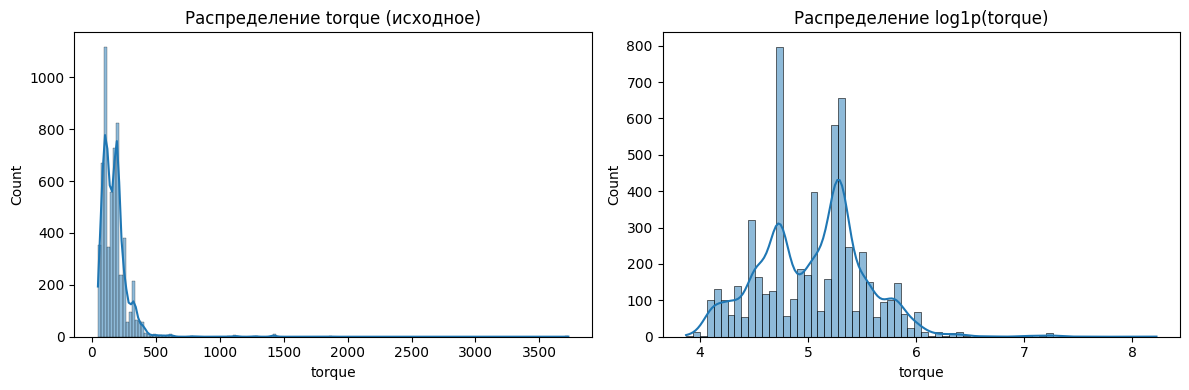

In [294]:
# your code here
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_train['torque'], kde=True)
plt.title('Распределение torque (исходное)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_train['torque']), kde=True)
plt.title('Распределение log1p(torque)')

plt.tight_layout()
plt.show()

In [295]:
log_X_train=X_train.copy()
log_X_test = X_test.copy()
log_X_train['torque'] = np.log1p(df_train['torque'])
log_X_test['torque'] = np.log1p(df_test['torque'])
lr.fit(log_X_train, y_train)


y_train_pred = lr.predict(log_X_train)
y_test_pred = lr.predict(log_X_test)
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train:,.0f}")
print(f"Test:  R2 = {r2_test:.4f}, MSE = {mse_test:,.0f}")

Train: R2 = 0.6138, MSE = 110,704,352,371
Test:  R2 = 0.6213, MSE = 217,677,300,804


### Получилось улучшить результат
### Из пункта 10 можно заметить, что график цены также похож на логарифм. По этому пролагорифм этот параметр

In [296]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
lr.fit(X_train, y_train_log)


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
r2_train = r2_score(y_train_log, y_train_pred)
mse_train = MSE(y_train_log, y_train_pred)

r2_test = r2_score(y_test_log, y_test_pred)
mse_test = MSE(y_test_log, y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train}")
print(f"Test:  R2 = {r2_test:.4f}, MSE = {mse_test}")

Train: R2 = 0.8257, MSE = 0.10188363874861014
Test:  R2 = 0.8616, MSE = 0.09902284302580922


### Получилось заметно улучшить результат
### Из пункта 10 можно заметить, что график year также похож на квадратичный. По этому возведем его в квадрат

In [297]:
sqr_X_train=X_train.copy()
sqr_X_test = X_test.copy()
sqr_X_train['year'] = df_train['year'] ** 2
sqr_X_test['year'] = df_test['year'] ** 2
lr.fit(sqr_X_train, y_train)


y_train_pred = lr.predict(sqr_X_train)
y_test_pred = lr.predict(sqr_X_test)
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train:,.0f}")
print(f"Test:  R2 = {r2_test:.4f}, MSE = {mse_test:,.0f}")

Train: R2 = 0.6012, MSE = 114,303,721,473
Test:  R2 = 0.6006, MSE = 229,606,250,033


### Получилось улучшить результат
### Из пункта 10 можно заметить, что график km_driven также похож на логарифм. По этому пролагорифм этот параметр

In [334]:
log_X_train=X_train.copy()
log_X_test = X_test.copy()
log_X_train['km_driven'] = np.log1p(df_train['km_driven'])
log_X_test['km_driven'] = np.log1p(df_test['km_driven'])
lr.fit(log_X_train, y_train)
 
y_train_pred = lr.predict(log_X_train)
y_test_pred = lr.predict(log_X_test)
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train:,.0f}")
print(f"Test:  R2 = {r2_test:.4f}, MSE = {mse_test:,.0f}")

Train: R2 = 0.6141, MSE = 110,599,651,216
Test:  R2 = 0.6171, MSE = 220,104,482,136


### Получилось улучшить результат
---
---
---

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

---
---
---

In [299]:
def business_metric(y_true, y_pred, threshold=0.10):
    relative_error = np.abs(y_true - y_pred) / y_true
    accuracy = np.mean(relative_error <= threshold)
    return accuracy

In [300]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_ridge = best_ridge.predict(X_test_final)
y_pred_lasso = best_lasso.predict(X_test_scaled)
y_pred_en = best_en.predict(X_test_scaled)

y_pred_mean = np.full_like(y_test, y_train.mean())

models = {
    'Linear Regression': y_pred_lr,
    'Ridge': y_pred_ridge,
    'Lasso': y_pred_lasso,
    'ElasticNet': y_pred_en,
    'Baseline (mean)': y_pred_mean
}

In [301]:
print("Business Metric (доля прогнозов с ошибкой ≤ 10%):")
results = {}
for name, y_pred in models.items():
    acc = business_metric(y_test, y_pred, threshold=0.10)
    results[name] = acc
    print(f"{name:20}: {acc:.4f} ({acc*100:.1f}%)")

Business Metric (доля прогнозов с ошибкой ≤ 10%):
Linear Regression   : 0.0000 (0.0%)
Ridge               : 0.2210 (22.1%)
Lasso               : 0.2420 (24.2%)
ElasticNet          : 0.2550 (25.5%)
Baseline (mean)     : 0.1100 (11.0%)


In [302]:
best_model = max(results, key=results.get)
print(f"Лучшая модель по бизнес-метрике: {best_model} ({results[best_model]:.4f})")

Лучшая модель по бизнес-метрике: ElasticNet (0.2550)


---
---
---

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



### Метрика
- Допустимая переоценка: до +15% (можно снизить цену)
- Допустимая недооценка: только до –5% (потеря прибыли)

In [303]:
def your_business_metrics(y_true, y_pred,under_tol=0.05, over_tol=0.15):
    rel_error = (y_pred - y_true) / y_true
    acceptable = (((rel_error >= -under_tol) & (rel_error <= 0)) | ((rel_error >= 0) & (rel_error <= over_tol)))
    return np.mean(acceptable)

In [304]:
models = {
    'Linear Regression': y_pred_lr,
    'Ridge': y_pred_ridge,
    'Lasso': y_pred_lasso,
    'ElasticNet': y_pred_en,
    'Baseline (mean)': y_pred_mean
}

In [305]:
results_asym = {}
for name, y_pred in models.items():
    acc = your_business_metrics(y_test, y_pred, under_tol=0.05, over_tol=0.15)
    results_asym[name] = acc
    print(f"{name:20}: {acc:.4f} ({acc*100:.1f}%)")

Linear Regression   : 0.0000 (0.0%)
Ridge               : 0.2240 (22.4%)
Lasso               : 0.2370 (23.7%)
ElasticNet          : 0.2260 (22.6%)
Baseline (mean)     : 0.1040 (10.4%)


In [306]:
best_model = max(results_asym, key=results_asym.get)
print(f"Лучшая модель по бизнес-метрике: {best_model} ({results_asym[best_model]:.4f})")

Лучшая модель по бизнес-метрике: Lasso (0.2370)


---
---
---

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [ ]:
log_X_train=X_train.copy()
log_X_test = X_test.copy()
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
log_X_train['torque'] = np.log1p(df_train['torque'])
log_X_test['torque'] = np.log1p(df_test['torque'])
log_X_train['year'] = df_train['year'] ** 2
log_X_test['year'] = df_test['year'] ** 2
log_X_train['km_driven'] = np.log1p(df_train['km_driven'])
log_X_test['km_driven'] = np.log1p(df_test['km_driven'])
lr.fit(log_X_train, y_train_log)


model = lr.predict(log_X_train)
y_test_pred = lr.predict(log_X_test)
r2_train = r2_score(y_train_log, model)
mse_train = MSE(y_train_log, model)

r2_test = r2_score(y_test_log, y_test_pred)
mse_test = MSE(y_test_log, y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train}")
print(f"Test:  R2 = {r2_test:.4f}, MSE = {mse_test}")

# Взято из примера с лекции

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, 'linear_model.pkl')
with open(model_path, 'wb') as f:   
    pickle.dump(lr, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Модель сохранена: {model_path}")

Train: R2 = 0.8294, MSE = 0.09969623514678867
Test:  R2 = 0.8653, MSE = 0.09631581410038834
✅ Модель сохранена: models\linear_model.pkl


In [336]:
log_X_train

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,4056196,11.887938,23.40,1248,74.00,5.252273,5,2000.0
1,4056196,11.695255,21.14,1498,103.52,5.525453,5,2500.0
2,4040100,11.751950,23.00,1396,90.00,5.396664,5,2750.0
3,4028049,11.695255,16.10,1298,88.20,4.734236,5,4500.0
4,4068289,10.714440,20.14,1197,81.86,4.742756,5,4000.0
...,...,...,...,...,...,...,...,...
5835,4032064,12.160034,17.92,1086,62.10,4.575741,5,3000.0
5836,4052169,10.819798,18.90,998,67.10,4.510860,5,3500.0
5837,4052169,11.608245,18.50,1197,82.85,4.742320,5,4000.0
5838,4028049,11.686887,16.80,1493,110.00,5.465354,5,2750.0


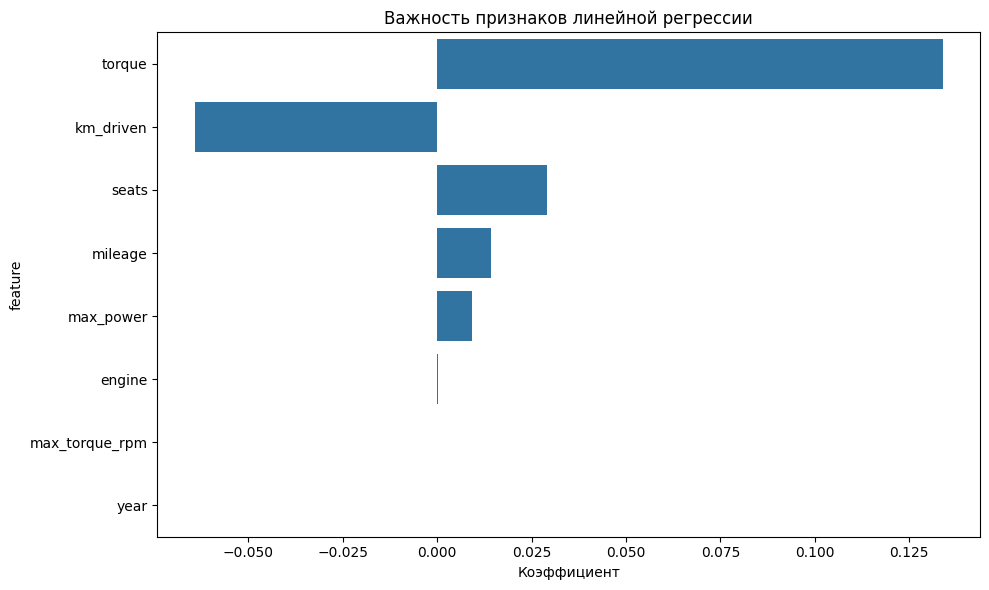

In [337]:
coeffs = lr.coef_
intercept = lr.intercept_

# Создаем DataFrame с коэффициентами и признаками
feature_importance = pd.DataFrame({
    'feature': log_X_train.columns,
    'coefficient': coeffs
}).sort_values('coefficient', ascending=False)

# Добавляем столбец с абсолютными значениями коэффициентов
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()

# Сортируем по абсолютному значению (важности)
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)


# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='coefficient', y='feature')
plt.title('Важность признаков линейной регрессии')
plt.xlabel('Коэффициент')
plt.tight_layout()
plt.show()

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
